# Multi-class Classication and Neural Networks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy.optimize import minimize
%matplotlib inline

In [2]:
data = sio.loadmat('data/ex3data1.mat')
weights = sio.loadmat('data/ex3weights.mat')

In [3]:
data.keys()

dict_keys(['__globals__', 'X', '__version__', 'y', '__header__'])

In [4]:
weights.keys()

dict_keys(['__globals__', 'Theta1', '__version__', '__header__', 'Theta2'])

In [5]:
y = data['y'].flatten()
X = np.column_stack((np.ones(data['X'].shape[0]), data['X']))
theta1 = weights['Theta1']
theta2 = weights['Theta2']

#### Plot of samples

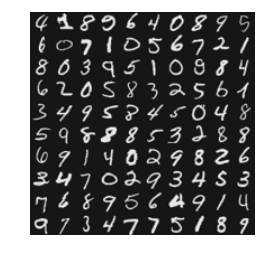

In [6]:
sample = np.random.choice(X.shape[0], 100)
x_copy = X[sample,1:].copy()
display_matrix = np.ones((200,200))

for n in range(0, 100):
    for m in range(0, 400):
        row = 20*np.floor_divide(n, 10) + np.floor_divide(m, 20)
        col = 20*np.mod(n, 10)+ np.mod(m, 20)
        display_matrix[row, col] = x_copy[n, m]
        #print(row, col)
plt.axis('off')
plt.imshow(display_matrix.T, cmap = "gray", aspect='equal')

#### Vectorization

In [7]:
#sigmoid function
def sigm(x):
    return(1/(1+np.exp(-x)))

#### Cost functions

\begin{equation}
J(\theta)=\frac{1}{m}\big((\log(X\theta))^T y+(\log(\boldsymbol{1}-h(X\theta)))^T(\boldsymbol{1}-y)\big)
\end{equation}

#### Gradient function

\begin{equation}
\frac{\partial J(\theta)}{\partial \theta} = \frac{1}{m}X^T\big(h(X\theta)-y\big)
\end{equation}

#### Cost function for Regularized logistic regression 

\begin{equation}
J(\theta)=\frac{1}{m}\big((\log(X\theta))^T y+(\log(\boldsymbol{1}-h(X\theta)))^T(\boldsymbol{1}-y)\big)+\frac{\lambda}{2m}\sum_{j=1}^{n}\theta^2_j
\end{equation}

In [8]:
#cost function
def costFunction(theta, X, y):
    m = len(y)
    #patch for log0:
    hx = sigm(np.dot(X, theta)).clip(min = 0.0001, max = 0.9999)
    J = 1/m*(-np.dot(y, np.log(hx))-np.dot((1-y),np.log(1-hx)))
    return(J)

In [9]:
def gradient(theta, X, y):
    m = len(y)
    hx = sigm(np.dot(X, theta))
    grad = 1/m*np.dot(X.T, hx-y)
    return(grad.flatten())

In [10]:
def costFunctionReg(theta, X, y, lam):
    m = len(y)
    #patch for log0:
    hx = sigm(np.dot(X, theta)).clip(min = 0.0001, max = 0.9999)
    J = 1/m*(-np.dot(y, np.log(hx))-np.dot((1-y),np.log(1-hx)))+lam/2/m*theta.dot(theta)
    return(J)

In [11]:
def gradientReg(theta, X, y, lam):
    m = len(y)
    hx = sigm(np.dot(X, theta))
    grad = 1/m*np.dot(X.T, hx-y)+lam/m*theta
    return(grad.flatten())

#### One-vs-all classification

In [12]:
def oneVsAll(X, y, num_labels, lam):
    m, n = X.shape
    all_theta = np.zeros((num_labels, n))
    for c in range(1, num_labels+1):
        initial_theta = np.zeros(n)
        res = minimize(costFunctionReg, initial_theta, args=(X, (y == c), lam), jac=gradientReg, options={'maxiter':50})
        all_theta[c-1, :] = res.x
    return(all_theta)

In [13]:
all_theta = oneVsAll(X, y, 10, 0.1)

In [14]:
def predOneVsAll(X, all_theta):
    prob = sigm(np.dot(X, all_theta.T))
    return(np.argmax(prob, axis = 1) + 1)

In [15]:
pred = predOneVsAll(X, all_theta)

In [16]:
print('The accuracy is: {}%'.format(sum(np.isclose(pred, y, atol=0))/len(y)*100))

The accuracy is: 93.38%


### Neural Network

#### For a two layers Neural network

\begin{align}
a^{(1)}&=x\\
z^{(2)}&=\theta^{(1)}a^{(1)}\\
a^{(2)}&=sigm(z^{(2)})\\
z^{(3)}&=\theta^{(2)}a^{(2)}\\
a^{(3)}&=sigm(z^{(3)})\\
\end{align}

In [17]:
def predict(theta1, theta2, feature):
    a1 = feature
    z2 = a1.dot(theta1.T)
    a2 = np.column_stack((np.ones(z2.shape[0]), sigm(z2)))
    z3 = a2.dot(theta2.T)
    a3 = sigm(z3)
    return(np.argmax(a3, axis = 1) + 1)

In [18]:
pred1 = predict(theta1, theta2, X)

In [19]:
print('The accuracy is: {}%'.format(sum(np.isclose(pred1, y, atol=0))/len(y)*100))

The accuracy is: 97.52%
